### A/B Testing:
* In A/B testing, we analyze the results of two marketing strategies to choose the best one for future marketing campaigns.
* For example when I choose to marketing for my one of product on Twitter, I select target audiance. In the same way for other product I select the target audiance, Both the target audiance are different, I compared the Market Stats then I get to know the Audiance I targetting in later case are more efficient hence I Select that Product over first one.

### Steps involved in A/B tessting:
1. **Designing experiment**
2. **Collecting and preparing the data**
3. **Visualising the results**
4. **Testing the hypothesis**
5. **Drawing conclusions**

### **Import Required Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load , Read & Understand the Data

In [22]:
ctrl_grp=pd.read_csv('D:\PGP IN DATA SCIENCE with Careerera\Data Sets\AB testing\\control_group.csv', sep=';')
ctrl_grp.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
test_grp=pd.read_csv('D:\PGP IN DATA SCIENCE with Careerera\Data Sets\AB testing\\test_group.csv', sep=';')
test_grp.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [10]:
# Shape & Size of Data
print(" Shape & Size of Control Group Data Set is {} & {}".format(ctrl_grp.shape, ctrl_grp.size))
print(" Shape & Size of Test Group Data Set is {} & {}".format(test_grp.shape, test_grp.size))

 Shape & Size of Control Group Data Set is (30, 10) & 300
 Shape & Size of Test Group Data Set is (30, 10) & 300


In [12]:
# columns
list(ctrl_grp.columns)

['Campaign Name',
 'Date',
 'Spend [USD]',
 '# of Impressions',
 'Reach',
 '# of Website Clicks',
 '# of Searches',
 '# of View Content',
 '# of Add to Cart',
 '# of Purchase']

In [14]:
# Data type
ctrl_grp.dtypes

Campaign Name           object
Date                    object
Spend [USD]              int64
# of Impressions       float64
Reach                  float64
# of Website Clicks    float64
# of Searches          float64
# of View Content      float64
# of Add to Cart       float64
# of Purchase          float64
dtype: object

In [15]:
# info() function
ctrl_grp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [16]:
# info() function
test_grp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [18]:
# Statistical measures
print(ctrl_grp.describe())
print('\n')
print(ctrl_grp.describe(include='O'))

       Spend [USD]  # of Impressions          Reach  # of Website Clicks  \
count    30.000000         29.000000      29.000000            29.000000   
mean   2288.433333     109559.758621   88844.931034          5320.793103   
std     367.334451      21688.922908   21832.349595          1757.369003   
min    1757.000000      71274.000000   42859.000000          2277.000000   
25%    1945.500000      92029.000000   74192.000000          4085.000000   
50%    2299.500000     113430.000000   91579.000000          5224.000000   
75%    2532.000000     121332.000000  102479.000000          6628.000000   
max    3083.000000     145248.000000  127852.000000          8137.000000   

       # of Searches  # of View Content  # of Add to Cart  # of Purchase  
count      29.000000          29.000000         29.000000      29.000000  
mean     2221.310345        1943.793103       1300.000000     522.793103  
std       866.089368         777.545469        407.457973     185.028642  
min      1001.0

In [19]:
# Statistical measures
print(test_grp.describe())
print('\n')
print(test_grp.describe(include='O'))

       Spend [USD]  # of Impressions          Reach  # of Website Clicks  \
count    30.000000         30.000000      30.000000            30.000000   
mean   2563.066667      74584.800000   53491.566667          6032.333333   
std     348.687681      32121.377422   28795.775752          1708.567263   
min    1968.000000      22521.000000   10598.000000          3038.000000   
25%    2324.500000      47541.250000   31516.250000          4407.000000   
50%    2584.000000      68853.500000   44219.500000          6242.500000   
75%    2836.250000      99500.000000   78778.750000          7604.750000   
max    3112.000000     133771.000000  109834.000000          8264.000000   

       # of Searches  # of View Content  # of Add to Cart  # of Purchase  
count      30.000000          30.000000         30.000000      30.000000  
mean     2418.966667        1858.000000        881.533333     521.233333  
std       388.742312         597.654669        347.584248     211.047745  
min      1854.0

In [23]:
# Missing values
print("Control Group:\n", ctrl_grp.isna().sum())
print('\n')
print("Test Group:\n", test_grp.isna().sum())

Control Group:
 Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64


Test Group:
 Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64


In [ ]:
ctrl_grp[ctrl_grp.isnull().any(axis= 1)]

Few Columns in control group data set contains missing value. Lets fill the missing values with mean of that column.

In [24]:
ctrl_grp['# of Impressions'].fillna(ctrl_grp['# of Impressions'].mean(), inplace=True)
ctrl_grp['Reach'].fillna(ctrl_grp['Reach'].mean(), inplace=True)
ctrl_grp['# of Website Clicks'].fillna(ctrl_grp['# of Website Clicks'].mean(), inplace=True)
ctrl_grp['# of Searches'].fillna(ctrl_grp['# of Searches'].mean(), inplace=True)
ctrl_grp['# of View Content'].fillna(ctrl_grp['# of View Content'].mean(), inplace=True)
ctrl_grp['# of Add to Cart'].fillna(ctrl_grp['# of Add to Cart'].mean(), inplace=True)
ctrl_grp['# of Purchase'].fillna(ctrl_grp['# of Purchase'].mean(), inplace=True)
ctrl_grp.isna().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

Now data set contains no missing values.

**Now merge two data sets to get single data set for further analysis**

In [25]:
data = ctrl_grp.merge(test_grp, how="outer").sort_values(["Date"])
data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
30,Test Campaign,1.08.2019,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
39,Test Campaign,10.08.2019,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0
9,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
40,Test Campaign,11.08.2019,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0


Column Name not makes any Scence lets rename the column with some understandable keyword

In [26]:
data.columns = ["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]
data.head()

,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
30,Test Campaign,1.08.2019,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
39,Test Campaign,10.08.2019,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0
9,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
40,Test Campaign,11.08.2019,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0


In [28]:
# Index number is Random, reset the index.
data = data.reset_index(drop=True)
data.head()

,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,1.08.2019,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,Test Campaign,10.08.2019,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0
3,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
4,Test Campaign,11.08.2019,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0


In [29]:
data.shape

(60, 10)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Campaign Name          60 non-null     object 
 1   Date                   60 non-null     object 
 2   Amount Spent           60 non-null     int64  
 3   Number of Impressions  60 non-null     float64
 4   Reach                  60 non-null     float64
 5   Website Clicks         60 non-null     float64
 6   Searches Received      60 non-null     float64
 7   Content Viewed         60 non-null     float64
 8   Added to Cart          60 non-null     float64
 9   Purchases              60 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 4.8+ KB


In [33]:
# Change Data type of Date column from object to DateTime
data['Date']=pd.to_datetime(data['Date'])
data.dtypes

Campaign Name                    object
Date                     datetime64[ns]
Amount Spent                      int64
Number of Impressions           float64
Reach                           float64
Website Clicks                  float64
Searches Received               float64
Content Viewed                  float64
Added to Cart                   float64
Purchases                       float64
dtype: object

##### Unique Values in Campaign name column

In [34]:
data['Campaign Name'].value_counts()

Control Campaign    30
Test Campaign       30
Name: Campaign Name, dtype: int64

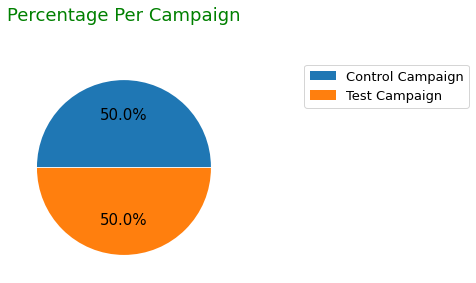

In [69]:
plt.pie(data['Campaign Name'].value_counts(), autopct='%1.1f%%', textprops={'fontsize': 15},explode = (0,0.01))
plt.title("Percentage Per Campaign",fontsize=18, pad=38, color="green")
plt.legend(fontsize=13, labels=[ "Control Campaign","Test Campaign"],bbox_to_anchor=(1.3, 1));

Both Control & Test Campaign has 30 rows.

##### Check whether our data has Duplicate rows.

In [35]:
data.duplicated().sum()

0

No Duplicate rows.

### Exploratory Data Analysis

#### Amount Spent on both compaigns.

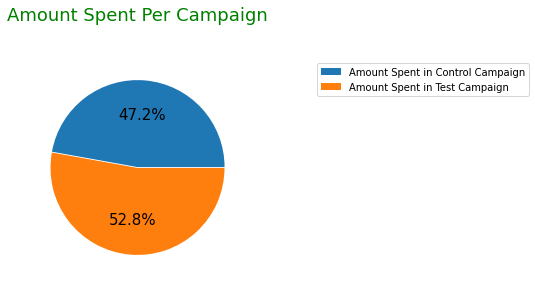

In [144]:
label = ["Amount Spent in Control Campaign", 
         "Amount Spent in Test Campaign"]
plt.pie(data.groupby('Campaign Name')['Amount Spent'].sum(), autopct='%1.1f%%', textprops={'fontsize': 15},explode = (0,0.01))
plt.title("Amount Spent Per Campaign",fontsize=18, pad=38, color='green')
plt.legend(fontsize=10, labels=label, bbox_to_anchor=(1.3, 1));

Nearly 53% of Money spent on Test Campaign.

In [70]:
pd.pivot_table(data=data, index='Campaign Name', values='Amount Spent', aggfunc=sum)

,Amount Spent
Campaign Name,
Control Campaign,68653
Test Campaign,76892


On Test Campaign $76892 has spent.

#### Amount Spent on Campaign Over year.

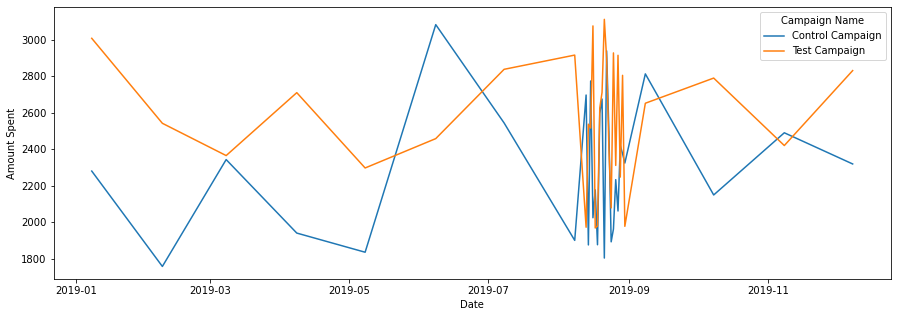

In [91]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Date', y='Amount Spent', hue='Campaign Name',data=data, );

from trend line, Amount Spend on Test Compaign is high & increasing every month wrt Month.

#### Number of Impressions per Campaign

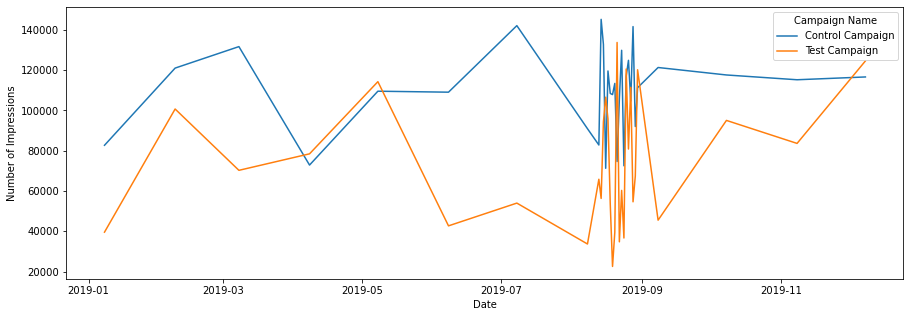

In [92]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Date', y='Number of Impressions', hue='Campaign Name',data=data, );

In [94]:
pd.pivot_table(data=data, index='Campaign Name', values='Number of Impressions', aggfunc=sum).round(2)

,Number of Impressions
Campaign Name,
Control Campaign,3286792.76
Test Campaign,2237544.00


Total Impressions on Control Compaign is high, trend is also showing the same.

#### What is count of Reach per Campaign.

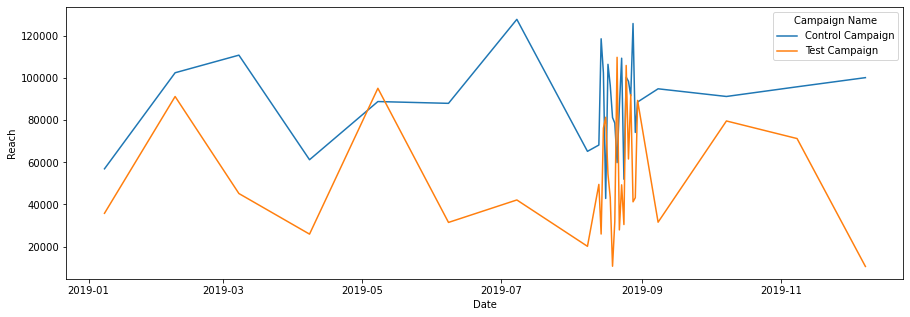

In [96]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Date', y='Reach', hue='Campaign Name',data=data, );

In [115]:
pd.pivot_table(data=data, index='Campaign Name', values='Reach', aggfunc=sum).round(2)

,Reach
Campaign Name,
Control Campaign,2665347.93
Test Campaign,1604747.00


Number of Reach on Control Campaign is increasing month by month. And the total count of reach is very high as compare to Test Campaign.

#### Website Clicks on Each Campaign

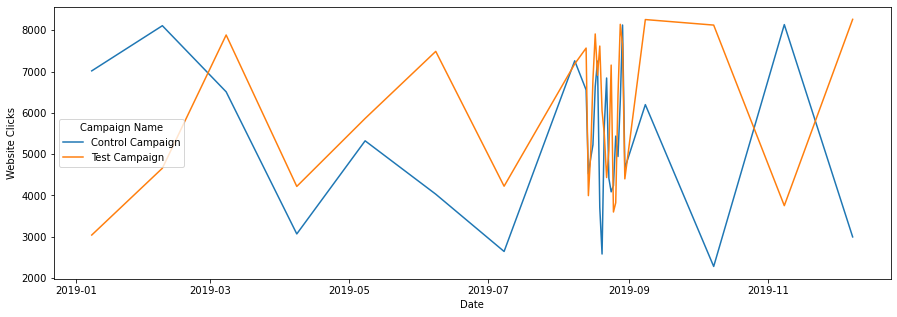

In [119]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Date', y='Website Clicks', hue='Campaign Name',data=data, );

In [117]:
pd.pivot_table(data=data, index='Campaign Name', values='Website Clicks', aggfunc=sum).round(2)

,Website Clicks
Campaign Name,
Control Campaign,159623.79
Test Campaign,180970.00


Overall Website Clicks are high is Test Campaign.

#### Searched through Campaign.

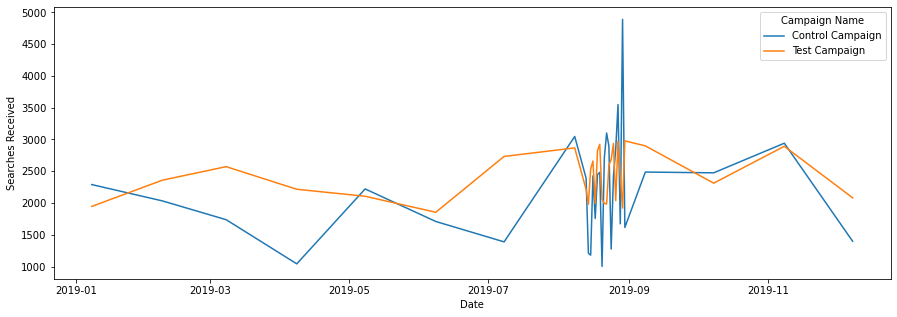

In [121]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Date', y='Searches Received', hue='Campaign Name',data=data, );

In [122]:
pd.pivot_table(data=data, index='Campaign Name', values='Searches Received', aggfunc=sum).round(2)

,Searches Received
Campaign Name,
Control Campaign,66639.31
Test Campaign,72569.00


Searches on Test Campaign is high.

#### Number of times content & product viewed in Both Campaign.

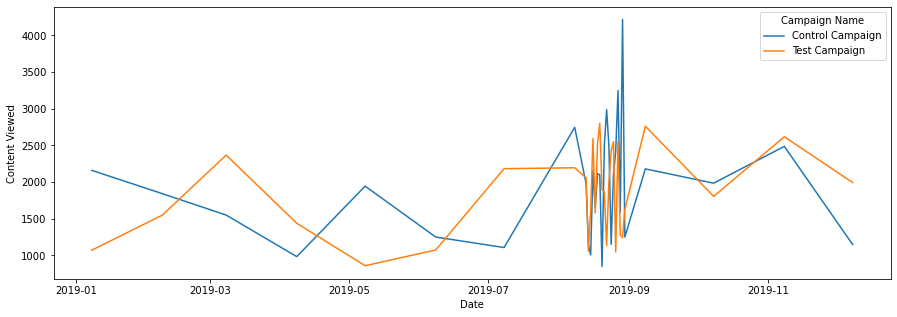

In [123]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Date', y='Content Viewed', hue='Campaign Name',data=data, );

In [124]:
pd.pivot_table(data=data, index='Campaign Name', values='Content Viewed', aggfunc=sum).round(2)

,Content Viewed
Campaign Name,
Control Campaign,58313.79
Test Campaign,55740.00


Content & Product views are more on Control Campaign.

#### Number of products added to Cart

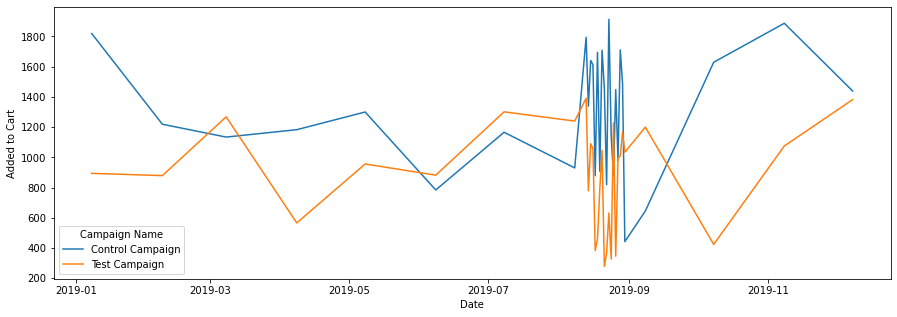

In [125]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Date', y='Added to Cart', hue='Campaign Name',data=data, );

In [126]:
pd.pivot_table(data=data, index='Campaign Name', values='Added to Cart', aggfunc=sum).round(2)

,Added to Cart
Campaign Name,
Control Campaign,39000.0
Test Campaign,26446.0


More Products of Control Campaign are added to Cart.

#### Product Purchased in both Campaign.

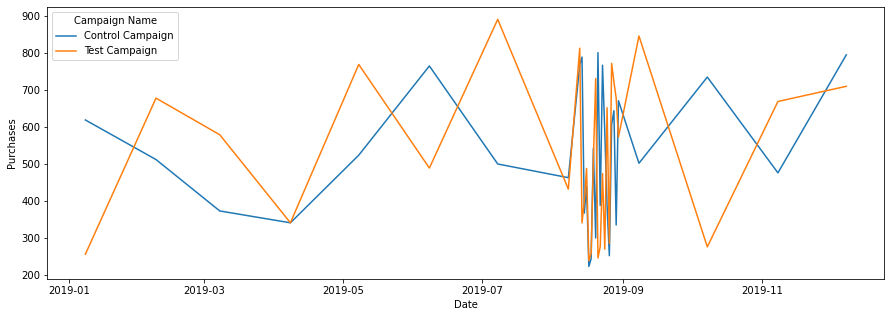

In [127]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Date', y='Purchases', hue='Campaign Name',data=data, );

In [128]:
pd.pivot_table(data=data, index='Campaign Name', values='Purchases', aggfunc=sum).round(2)

,Purchases
Campaign Name,
Control Campaign,15683.79
Test Campaign,15637.00


Most Product Purchased in Control Campaign.

In [152]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

#### Relationship between the Number of Impressions from both Campaigns and the Amount Spent on Both Campaigns

In [158]:
figure = px.scatter(data_frame = data, 
                    x="Number of Impressions",
                    y="Amount Spent", 
                    size="Amount Spent", 
                    color= "Campaign Name", 
                    trendline="ols")
figure.show()

The Control Campaign resulted in more Impressions according to the Amount Spent on Both Campaigns.

#### Relationship between the Number of Website Clicks and Content Viewed from both Campaigns:

In [159]:
figure = px.scatter(data_frame = data, 
                    x="Content Viewed",
                    y="Website Clicks", 
                    size="Website Clicks", 
                    color= "Campaign Name", 
                    trendline="ols")
figure.show()

The website clicks are higher in the test campaign, but the engagement from website clicks is higher in the control campaign. So the control campaign is better.

#### Relationship Between the Amount of Content Viewed and the Number of Products Added to the Cart from Both Campaigns:

In [161]:
figure = px.scatter(data_frame = data, 
                    y="Added to Cart",
                    x="Content Viewed", 
                    size="Added to Cart", 
                    color= "Campaign Name", 
                    trendline="ols")
figure.show()

The content views are higher in the Control campaign, and the product added to Cartis also higher in the control campaign. So the control campaign is better.

#### Relationship Between the Number of Products added to the cart and the Number of Sales from both campaigns:

In [164]:
figure = px.scatter(data_frame = data, 
                    x="Purchases",
                    y="Added to Cart", 
                    size="Purchases", 
                    color= "Campaign Name", 
                    trendline="ols")
figure.show()

Control Campaign results in more Sales but Probability of purchase wrt Cart added is high in Case of Test.

### Statistical Summery

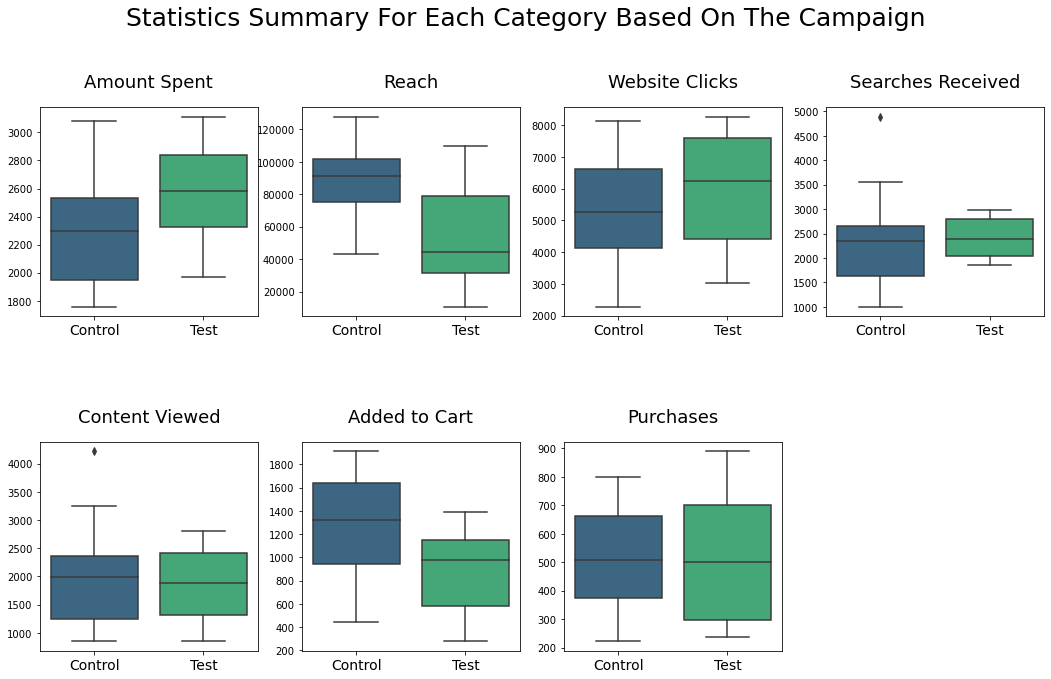

In [165]:
fig, ax = plt.subplots(2,4, figsize=(18,10), sharex=False, sharey=False)

cols= data.columns[np.r_[2,4:10]]

r=0
c=0
for col in cols:
    sns.boxplot(x= 'Campaign Name',
                y= col,
                data= data,
                palette="viridis", ax=ax[r,c])
    ax[r,c].set_title(col, fontsize=18, color="k", pad=20)
    ax[r,c].set_xlabel('')
    ax[r,c].set_ylabel('')
    ax[r,c].set_xticklabels( labels=["Control", "Test"], fontsize=14)
    
    if c>=3:
        r+=1
        c=-1
    c+=1
    
plt.subplots_adjust(hspace = 0.6, wspace=0.2)
fig.suptitle("Statistics Summary For Each Category Based On The Campaign", fontsize=25, color="k", y=1.02)

ax[1,3].set_yticks([])
ax[1,3].set_xticks([])
sns.despine(bottom=True, top=True, left=True, right=True, trim=True, ax=ax[1,3])

**Amount Spent:**
* The minimum amount of spent for the Test Campaign is greater than that of the Control Compaign.
* The maximum amount of spent for the Test Campaign is greater than that of the Control Compaign.
* More than 75% of the amount of spending for the test group is greater than 50% of the amount of spending for the control group.

**Reach:**
* Minimum of unique observations in the Control Campaign is greater than the Minimum in the Test Campaign.
* Maximum in the Control is greater than the maximum in the Test.

**Website Click:**
* Minimum number of clicks in the control is smaller than the minimum in the test.
* Maximum in the test from the maximum in the control With a very small difference.

**Searches Recieved**:
* Minimum number of searches for the test group is greater than the 25% level of the number of research for the control. but we the total spread of data for the control is much greater than the test.

**Content Viwed:**
* Minimum and the first, second and third quartile levels of the view content numbers for both are very close, but the maximum for the control was greater than the test.

**Added to Cart:**
* Minimum number of people who added to cart in the control is greater than the minimum in the test, and that 25% of the number of people who added to cart in the control group is greater than the maximum in the test.

**Purchase:**
* Minimum and average number of purchases in both are almost close, but that 25% of the maximum number of purchases in the control is greater than 25% in the test.

**Conclusion**
* From the above A/B tests, we found that the control campaign resulted in more sales and engagement.
* More products were viewed from the control campaign, resulting in more products in the cart and more sales.
* Conversation rate of products in the cart is higher in the test campaign.
* The test campaign resulted in more sales according to the products viewed and added to the cart.
* Control campaign results in more sales overall.
* The Test campaign can be used to market a specific product to a specific audience, and the Control campaign can be used to market multiple products to a wider audience.